In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import plotly.express as px

In [29]:
df = pd.read_excel('../data/Portfolio_by_Location.xls')
df

,Federal Student Loan Portfolio by Borrower Location,Unnamed: 1,Unnamed: 2
0,Includes outstanding principal and interest ba...,NaN,NaN
1,Data Source: Enterprise Data Warehouse,NaN,NaN
2,"Data as of September 30, 2023",NaN,NaN
3,NaN,NaN,NaN
4,Location,Balance (in billions),Borrowers (in thousands)
...,...,...,...
56,Wyoming,1.7,56
57,Other,4.4,94.6
58,Not Reported,68.8,2665.3
59,NaN,NaN,NaN


In [30]:
df = pd.read_excel("../data/Portfolio_by_Location.xls", skiprows=5, names=["Location", "Balance (in billions)", "Borrowers (in thousands)"])
df = df.iloc[:-1]

df = df.dropna(subset=['Location'])

df = df.reset_index(drop=True)

df

,Location,Balance (in billions),Borrowers (in thousands)
0,Alabama,23.9,653.2
1,Alaska,2.4,68.8
2,Arizona,31.7,914.0
3,Arkansas,13.2,401.8
4,California,146.7,3976.6
5,Colorado,28.8,792.0
6,Connecticut,18.3,517.0
7,Delaware,5.0,133.9
8,District of Columbia,6.4,119.0
9,Florida,103.3,2713.8


In [31]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia' : 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico' : 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
df['State'] = df['Location'].map(us_state_abbrev)
df

,Location,Balance (in billions),Borrowers (in thousands),State
0,Alabama,23.9,653.2,AL
1,Alaska,2.4,68.8,AK
2,Arizona,31.7,914.0,AZ
3,Arkansas,13.2,401.8,AR
4,California,146.7,3976.6,CA
5,Colorado,28.8,792.0,CO
6,Connecticut,18.3,517.0,CT
7,Delaware,5.0,133.9,DE
8,District of Columbia,6.4,119.0,DC
9,Florida,103.3,2713.8,FL


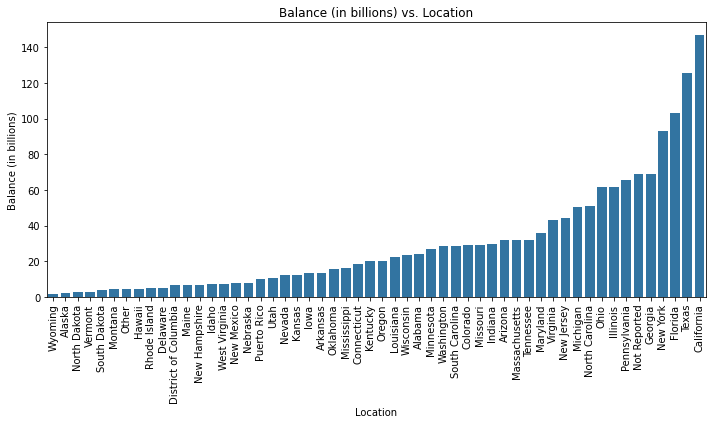

In [32]:
df_sorted = df.sort_values(by='Balance (in billions)')
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Balance (in billions)', data=df_sorted, order=df_sorted['Location'])
plt.title('Balance (in billions) vs. Location')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

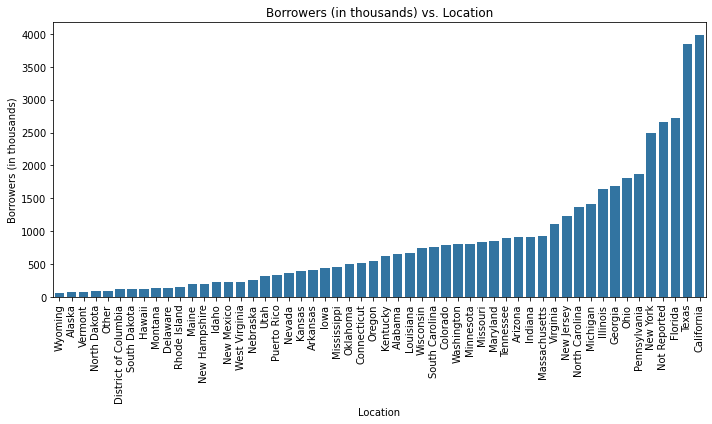

In [33]:
df_sorted = df.sort_values(by='Borrowers (in thousands)')
plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Borrowers (in thousands)', data=df_sorted, order=df_sorted['Location'])
plt.title('Borrowers (in thousands) vs. Location')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

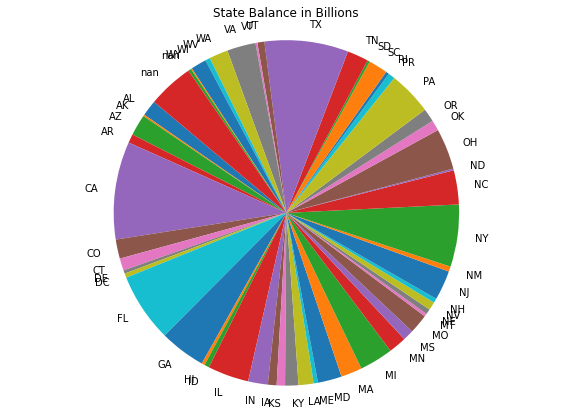

In [34]:
plt.figure(figsize=(10, 7), facecolor='white')

plt.pie(df['Balance (in billions)'], labels=df['State'], autopct='', startangle=140)  
plt.axis('equal') 
plt.title('State Balance in Billions')

plt.show()

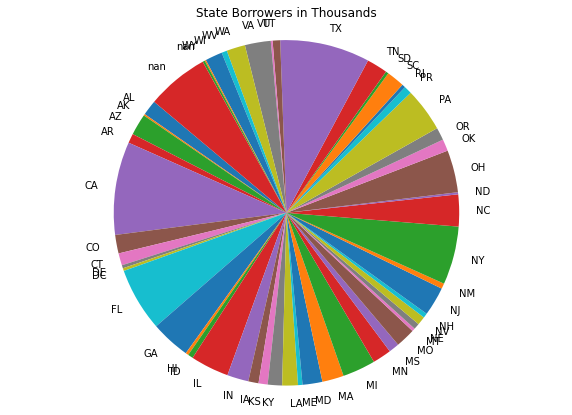

In [35]:
plt.figure(figsize=(10, 7), facecolor='white')

plt.pie(df['Borrowers (in thousands)'], labels=df['State'], autopct='', startangle=140)  
plt.axis('equal')  
plt.title('State Borrowers in Thousands')

plt.show()

In [36]:
df_usa = df[df['Location'].isin(us_state_abbrev.keys())]
df_other = df[~df['Location'].isin(us_state_abbrev.keys())] # contains rows "other" and "not reported"

fig_balance = px.choropleth(df_usa, 
                             locationmode='USA-states', 
                             locations='State', 
                             color='Balance (in billions)', 
                             scope='usa',
                             title='Balance by State (in billions)',
                             color_continuous_scale='Viridis')

counter = 0
for i, row in df_other.iterrows():
    fig_balance.add_annotation(
        x=0.1,
        y=counter * 0.1 + 0.05,  
        text=f"{row['Location']}: {row['Balance (in billions)']} billion",
        showarrow=False,
        xanchor="center",
        yanchor="middle",
        font=dict(color="black")
    )
    counter += 1

fig_balance.update_coloraxes(colorbar_title=None)

fig_balance.show()

In [37]:
fig_borrower = px.choropleth(df_usa, 
                             locationmode='USA-states', 
                             locations='State', 
                             color='Borrowers (in thousands)', 
                             scope='usa',
                             title='Borrowers by State (in thousands)',
                             color_continuous_scale='Viridis')

counter = 0
for i, row in df_other.iterrows():
    fig_borrower.add_annotation(
        x=0.1,
        y=counter * 0.1 + 0.05,  
        text=f"{row['Location']}: {row['Borrowers (in thousands)']}",
        showarrow=False,
        xanchor="center",
        yanchor="middle",
        font=dict(color="black")
    )
    counter += 1

fig_borrower.update_coloraxes(colorbar_title=None)

fig_borrower.show()